In [3]:
#　10章　データの操作
#　解決すべき問題が特定され、そのためのデータが得られたなら、最初に行うのはそのデータを調べること

from collections import Counter
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10) is (very close to) 0
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break

    return mid_z

In [ ]:
#　10.1.1
#　最初に行うべきは、統計量の計算
#　データ数、最小値、最大値、平均値、標準偏差　などを算出する
#　　→　それらの値がデータに対する理解に寄与しない場合、次にヒストグラムを作成する
#　　　　（つまり、値をいくつかの範囲（バケツ）に分割し、それぞれのバケツにいくつのデータが入るかを数える）

def bucketize(point, bucket_size):
    """pointの値を切り捨てて、バケツの下限の値に揃える"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """pointをバケツに入れ、何個入ったか数える"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()
    
random.seed(0)

#　-100から100までの一様分布
uniform = [200 * random.random() - 100 for _ in range(10000)]

#　平均0、標準偏差57の正規分布
normal = [57 * inverse_normal_cdf(random.random()) for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

plot_histogram(normal, 10, "Normal Histogram")

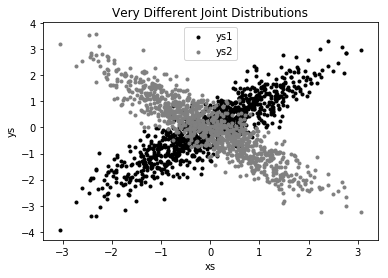

0.8888354521909122
-0.898904945083066


In [10]:
#　10.1.2

def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker=".", color='black', label='ys1')
plt.scatter(xs, ys2, marker=".", color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

def standard_deviation(x):
    return math.sqrt(variance(x))

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def mean(x): 
    return sum(x) / len(x)

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

print(correlation(xs, ys1))
print(correlation(xs, ys2))